In [ ]:
# 1. 가장많이 사용된 알파벳 문자 구하기(birth 뻬고 )
# 2. 이름 첫 글짜 유형분석
# 3. 연도별 성별에 따른 이름의 평균 글자 길이 구히고 시각화 하시오 
# 4. 모음 변화 분석하기(a,e,i,o,u) 이름을 구성하는 문자중에서 모음의 비율 변화
# 5. 각 연도별 가장 인기있는 이름들을 추출하여 파일로 저장하시오

In [7]:
import pandas as pd

yob1880 = pd.read_csv('babynames/yob1880.txt', names = ['name', 'gender', 'births'])

columns = ['name', 'gender', 'births']
pieces = []
for year in range(1880, 2011):
    frame = pd.read_csv("babynames/yob%d.txt" %year, names = columns)
    frame['year'] = year
    pieces.append(frame)
print(pieces)

names = pd.concat(pieces, ignore_index=True)
# names

totalbirths = names.pivot_table('births', index= 'year', columns='gender', aggfunc=sum)
totalbirths

[           name gender  births  year
0          Mary      F    7065  1880
1          Anna      F    2604  1880
2          Emma      F    2003  1880
3     Elizabeth      F    1939  1880
4        Minnie      F    1746  1880
...         ...    ...     ...   ...
1995     Woodie      M       5  1880
1996     Worthy      M       5  1880
1997     Wright      M       5  1880
1998       York      M       5  1880
1999  Zachariah      M       5  1880

[2000 rows x 4 columns],            name gender  births  year
0          Mary      F    6919  1881
1          Anna      F    2698  1881
2          Emma      F    2034  1881
3     Elizabeth      F    1852  1881
4      Margaret      F    1658  1881
...         ...    ...     ...   ...
1930     Wiliam      M       5  1881
1931     Wilton      M       5  1881
1932       Wing      M       5  1881
1933       Wood      M       5  1881
1934     Wright      M       5  1881

[1935 rows x 4 columns],            name gender  births  year
0          Mary      F

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


In [201]:
pattern = '[a-z]'
name_lower = names.name.str.lower()
name_find = name_lower.str.findall(pat=pattern)
name_list = []

for i in range(len(b)):
    for j in range(len(b[i])):
        name_list.append(b[i][j])
pd.Series(name_list).value_counts().index[0]

####### 남자
man = names[names['sex'] == 'M']
man_lower = man.name.str.lower()
man_find = man_lower.str.findall(pat= pattern)
man_list = []

d.reset_index(drop=True, inplace = True)
for i in range(len(man_list)):
    for j in range(len(b[i])):
        man_list.append(b[i][j])

pd.Series(man_list).value_count().index[0]

####### 여자
woman = names[names['sex'] == 'F']
woman_lower = woman.name.str.lower()
woman_find = woman_lower.str.findall(pat= pattern)
woman_list = []

d.reset_index(drop=True, inplace = True)
for i in range(len(woman_list)):
    for j in range(len(b[i])):
        woman_list.append(b[i][j])

pd.Series(man_list).value_count().index[0]

KeyboardInterrupt: 

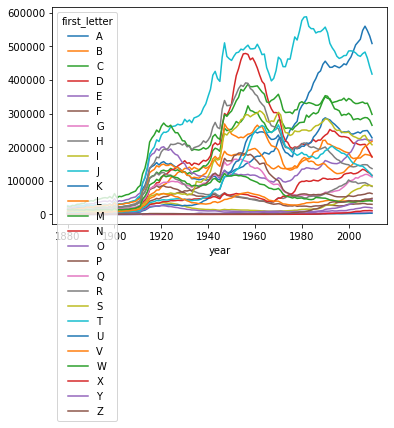

In [215]:
# 2. 이름 첫 글짜 유형분석
names.name.str[-1]
names['first'] = names.name.str[-1]

names

getFirstLetter = lambda x:x[0]

FirstLetter = names.name.map(getFirstLetter)
FirstLetter.name = 'first_letter'

FirstLetter

table = names.pivot_table('births',index ='year' , columns =FirstLetter, aggfunc = sum)

table.plot()

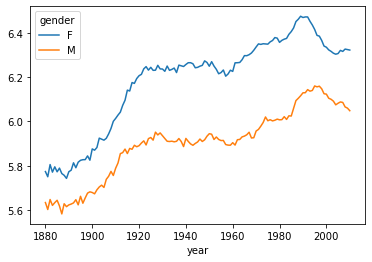

In [125]:
# 3. 연도별 성별에 따른 이름의 평균 글자 길이 구히고 시각화 하시오 
import numpy as np

length  = lambda x : len(x)

names['length'] = names['name'].str.len()
table2 = names.pivot_table('length', index = 'year', columns = 'gender', aggfunc = np.mean)

table2.plot()

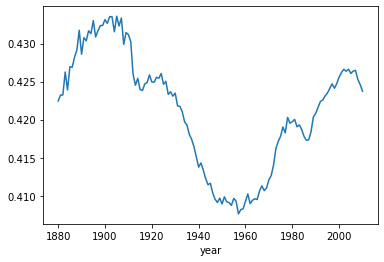

In [225]:
#  4. 모음 변화 분석하기(a,e,i,o,u) 이름을 구성하는 문자중에서 모음의 비율 변화


names['len']=names.name.str.len()

names['aeiou']=name_lower.str.count(pat='[a,e,i,o,u]')
names_vowel=names.groupby('year')['len','aeiou'].sum()
names_vowel['vowel']=(names_vowel['aeiou']/names_vowel['len'])

names_vowel['vowel'].plot()

In [80]:
#  5. 각 연도별 가장 인기있는 이름들을 추출하여 파일로 저장하시오
def getTop(group):
    return group.sort_values('births', ascending = False)[:1]


table5 = names.groupby(['year', 'gender']).apply(getTop)
table5.reset_index(drop=True, inplace=True)
table5.drop('first', axis=1, inplace=True)
table5.drop('length', axis=1, inplace=True)

table5.pivot_table('name', index = 'year', columns=['gender'], aggfunc='first')


,name,gender,births,year
0,Mary,F,7065,1880
1,John,M,9655,1880
2,Mary,F,6919,1881
3,John,M,8769,1881
4,Mary,F,8149,1882
...,...,...,...,...
257,Jacob,M,22507,2008
258,Isabella,F,22222,2009
259,Jacob,M,21036,2009
260,Isabella,F,22731,2010


In [214]:
# 6. 추천 시스템

import pandas as pd
import numpy as np

critics = {
    '레드벨벳': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '블랙핑크': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '사랑과전쟁': 3.5,
    },
    '소녀시대': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '마마무': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '오마이걸': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '모모랜드': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '우주소녀': {'겨울왕국': 4.5, 
                '사랑과전쟁': 1.0,
                '넘버3': 4.0}}

movie = pd.DataFrame(critics)
movie.fillna(0)
movie.corr()

,레드벨벳,BTS,블랙핑크,소녀시대,마마무,오마이걸,모모랜드,우주소녀
레드벨벳,1.000000,0.054772,0.396059,0.404520,0.566947,0.558291,0.747018,0.991241
BTS,0.054772,1.000000,0.216930,0.569210,0.154303,0.417911,-0.284463,-0.381246
블랙핑크,0.396059,0.216930,1.000000,0.204598,0.314970,0.359313,0.963796,0.381246
소녀시대,0.404520,0.569210,0.204598,1.000000,1.000000,0.134840,0.134840,-1.000000
마마무,0.566947,0.154303,0.314970,1.000000,1.000000,0.707107,0.028571,0.893405
오마이걸,0.558291,0.417911,0.359313,0.134840,0.707107,1.000000,0.060437,0.924473
모모랜드,0.747018,-0.284463,0.963796,0.134840,0.028571,0.060437,1.000000,0.662849
우주소녀,0.991241,-0.381246,0.381246,-1.000000,0.893405,0.924473,0.662849,1.000000
